<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Reading-data" data-toc-modified-id="Reading-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Reading data</a></span><ul class="toc-item"><li><span><a href="#Since-we-got-the-information-of-the-label-column,-we-will-drop-in-order-to-have-only-pixel-information" data-toc-modified-id="Since-we-got-the-information-of-the-label-column,-we-will-drop-in-order-to-have-only-pixel-information-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Since we got the information of the label column, we will drop in order to have only pixel information</a></span></li><li><span><a href="#We-need-to-check-if-our-sample-is-well-distributed,-so-we-plot-a-histogram-of-our-labels" data-toc-modified-id="We-need-to-check-if-our-sample-is-well-distributed,-so-we-plot-a-histogram-of-our-labels-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>We need to check if our sample is well distributed, so we plot a histogram of our labels</a></span></li></ul></li><li><span><a href="#Checking-if-the-data-is-normalized" data-toc-modified-id="Checking-if-the-data-is-normalized-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Checking if the data is normalized</a></span><ul class="toc-item"><li><span><a href="#So-the-max-value-is-255,-we-will-rescale-our-data-to-this-value" data-toc-modified-id="So-the-max-value-is-255,-we-will-rescale-our-data-to-this-value-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>So the max value is 255, we will rescale our data to this value</a></span></li><li><span><a href="#Now-the-data-is-normalized" data-toc-modified-id="Now-the-data-is-normalized-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Now the data is normalized</a></span></li><li><span><a href="#We-have-to-use-one-hot-encoding-for-our-data-in-order-to-match-the-output-of-our-Neural-Network" data-toc-modified-id="We-have-to-use-one-hot-encoding-for-our-data-in-order-to-match-the-output-of-our-Neural-Network-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>We have to use one hot encoding for our data in order to match the output of our Neural Network</a></span><ul class="toc-item"><li><span><a href="#So-now-our-labels-will-be-arrays-corresponding-to-a-number" data-toc-modified-id="So-now-our-labels-will-be-arrays-corresponding-to-a-number-1.2.3.1"><span class="toc-item-num">1.2.3.1&nbsp;&nbsp;</span>So now our labels will be arrays corresponding to a number</a></span></li></ul></li></ul></li><li><span><a href="#Format-of-the-images" data-toc-modified-id="Format-of-the-images-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Format of the images</a></span><ul class="toc-item"><li><span><a href="#Separating-the-training-and-verification-data" data-toc-modified-id="Separating-the-training-and-verification-data-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Separating the training and verification data</a></span></li></ul></li></ul></li><li><span><a href="#Build-our-model" data-toc-modified-id="Build-our-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Build our model</a></span><ul class="toc-item"><li><span><a href="#Making-a-Beta-VAE" data-toc-modified-id="Making-a-Beta-VAE-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Making a Beta-VAE</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow import keras
import tensorflow as tf
import os
from datetime import datetime
from functional import compose, partial
import functools
%matplotlib inline
print(os.listdir("input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'sample_submission.csv', 'train.csv']


# EDA

## Reading data

In [2]:
train_imgs = pd.read_csv("input/train.csv")
test_imgs = pd.read_csv("input/test.csv")

In [3]:
label_train = train_imgs["label"]

### Since we got the information of the label column, we will drop in order to have only pixel information

In [4]:
img_train = train_imgs.drop(labels= "label", axis = 1)
del train_imgs

### We need to check if our sample is well distributed, so we plot a histogram of our labels

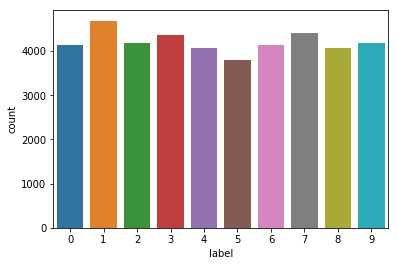

In [5]:
sns.countplot(label_train)

We have a well distributed sample

## Checking if the data is normalized

In [6]:
img_train.max().max()

255

In [7]:
test_imgs.max().max()

255

### So the max value is 255, we will rescale our data to this value

In [8]:
img_train = img_train/255.
test_imgs = test_imgs/255.

### Now the data is normalized

In [9]:
print(img_train.max().max())
print(test_imgs.max().max())

1.0
1.0


### We have to use one hot encoding for our data in order to match the output of our Neural Network

In [10]:
label_train = keras.utils.to_categorical(label_train, num_classes= 10)

#### So now our labels will be arrays corresponding to a number

In [11]:
label_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## Format of the images

In [12]:
img_train = img_train.values
test_imgs = test_imgs.values

### Separating the training and verification data

In [13]:
train_x , test_x , train_y , test_y = train_test_split(img_train , label_train , 
                                            test_size = 0.2 ,
                                            random_state = 42)

In [14]:
train_x[0].shape

(784,)

In [15]:
n_samples = train_x[0].shape[0]

# Build our model

## Making a Beta-VAE

from: https://jmetzen.github.io/2015-11-27/vae.html

see also: https://github.com/oduerr/dl_tutorial/blob/master/tensorflow/vae/vae_demo.ipynb

In [21]:
def xavier_init(fan_in, fan_out, constant=1): 
    """ Xavier initialization of network weights"""
    # https://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
    low = -constant*np.sqrt(6.0/(fan_in + fan_out)) 
    high = constant*np.sqrt(6.0/(fan_in + fan_out))
    return tf.random_uniform((fan_in, fan_out), 
                             minval=low, maxval=high, 
                             dtype=tf.float32)

In [22]:
#Creating a Training Set Class

class Dataset:
    """Creates a class method dataset.
    
    Parameters:
    ---------------------------------
    data(np.array): np.array with data.
    """
    #From https://stackoverflow.com/questions/40994583/how-to-implement-tensorflows-next-batch-for-own-data
    def __init__(self,data):
        self._index_in_epoch = 0
        self._epochs_completed = 0
        self._data = data
        self._num_examples = data.shape[0]
        pass
    
    
    @property
    def data(self):
        return self._data
    
    def next_batch(self,batch_size,shuffle = True):
        
        start = self._index_in_epoch
        
        if start == 0 and self._epochs_completed == 0:
            idx = np.arange(0, self._num_examples)  # get all possible indexes
            np.random.shuffle(idx)  # shuffle indexes
            self._data = self.data[idx]  # get list of `num` random samples
    
        # go to the next batch
        if start + batch_size > self._num_examples:
            self._epochs_completed += 1
            rest_num_examples = self._num_examples - start
            data_rest_part = self.data[start:self._num_examples]
            idx0 = np.arange(0, self._num_examples)  # get all possible indexes
            np.random.shuffle(idx0)  # shuffle indexes
            self._data = self.data[idx0]  # get list of `num` random samples
    
            start = 0
            self._index_in_epoch = batch_size - rest_num_examples #avoid the case where the #sample != integer times of batch_size
            end =  self._index_in_epoch  
            data_new_part =  self._data[start:end]  
            return np.concatenate((data_rest_part, data_new_part), axis=0)
        else:
            self._index_in_epoch += batch_size
            end = self._index_in_epoch
            return self._data[start:end]

In [23]:
class VariationalAutoencoder(object):
    """ Variation Autoencoder (VAE) with an sklearn-like interface implemented using TensorFlow.
    
    This implementation uses probabilistic encoders and decoders using Gaussian 
    distributions and  realized by multi-layer perceptrons. The VAE can be learned
    end-to-end.
    
    See "Auto-Encoding Variational Bayes" by Kingma and Welling for more details.
    """
    def __init__(self, network_architecture, transfer_fct=tf.nn.softplus, 
                 learning_rate=0.001, batch_size=100,beta=1):
        self.network_architecture = network_architecture
        self.transfer_fct = transfer_fct
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.beta= beta # for beta-vae here beta=1 means usual vae
        
        # tf Graph input
        self.x = tf.placeholder(tf.float32, [None, network_architecture["n_input"]])
        
        # Create autoencoder network
        self._create_network()
        # Define loss function based variational upper-bound and 
        # corresponding optimizer
        self._create_loss_optimizer()
        print("beta=",self.beta)
        # Initializing the tensor flow variables
        init = tf.global_variables_initializer()

        # Launch the session
        self.sess = tf.InteractiveSession()
        self.sess.run(init)
    
    def _create_network(self):
        # Initialize autoencode network weights and biases
        network_weights = self._initialize_weights(**self.network_architecture)

        # Use recognition network to determine mean and 
        # (log) variance of Gaussian distribution in latent
        # space
        self.z_mean, self.z_log_sigma_sq = \
            self._recognition_network(network_weights["weights_recog"], 
                                      network_weights["biases_recog"])

        # Draw one sample z from Gaussian distribution
        n_z = self.network_architecture["n_z"]
        eps = tf.random_normal((self.batch_size, n_z), 0, 1, 
                               dtype=tf.float32)
        # z = mu + sigma*epsilon
        #self.z = tf.add(self.z_mean, 
                        #tf.mul(tf.sqrt(tf.exp(self.z_log_sigma_sq)), eps))
        self.z = tf.add(self.z_mean, 
                        tf.multiply(tf.sqrt(tf.exp(self.z_log_sigma_sq)), eps))

        # Use generator to determine mean of
        # Bernoulli distribution of reconstructed input
        self.x_reconstr_mean = \
            self._generator_network(network_weights["weights_gener"],
                                    network_weights["biases_gener"])
            
    def _initialize_weights(self, n_hidden_recog_1, n_hidden_recog_2, 
                            n_hidden_gener_1,  n_hidden_gener_2, 
                            n_input, n_z):
        all_weights = dict()
        all_weights['weights_recog'] = {
            'h1': tf.Variable(xavier_init(n_input, n_hidden_recog_1)),
            'h2': tf.Variable(xavier_init(n_hidden_recog_1, n_hidden_recog_2)),
            'out_mean': tf.Variable(xavier_init(n_hidden_recog_2, n_z)),
            'out_log_sigma': tf.Variable(xavier_init(n_hidden_recog_2, n_z))}
        all_weights['biases_recog'] = {
            'b1': tf.Variable(tf.zeros([n_hidden_recog_1], dtype=tf.float32)),
            'b2': tf.Variable(tf.zeros([n_hidden_recog_2], dtype=tf.float32)),
            'out_mean': tf.Variable(tf.zeros([n_z], dtype=tf.float32)),
            'out_log_sigma': tf.Variable(tf.zeros([n_z], dtype=tf.float32))}
        all_weights['weights_gener'] = {
            'h1': tf.Variable(xavier_init(n_z, n_hidden_gener_1)),
            'h2': tf.Variable(xavier_init(n_hidden_gener_1, n_hidden_gener_2)),
            'out_mean': tf.Variable(xavier_init(n_hidden_gener_2, n_input)),
            'out_log_sigma': tf.Variable(xavier_init(n_hidden_gener_2, n_input))}
        all_weights['biases_gener'] = {
            'b1': tf.Variable(tf.zeros([n_hidden_gener_1], dtype=tf.float32)),
            'b2': tf.Variable(tf.zeros([n_hidden_gener_2], dtype=tf.float32)),
            'out_mean': tf.Variable(tf.zeros([n_input], dtype=tf.float32)),
            'out_log_sigma': tf.Variable(tf.zeros([n_input], dtype=tf.float32))}
        return all_weights
            
    def _recognition_network(self, weights, biases):
        # Generate probabilistic encoder (recognition network), which
        # maps inputs onto a normal distribution in latent space.
        # The transformation is parametrized and can be learned.
        layer_1 = self.transfer_fct(tf.add(tf.matmul(self.x, weights['h1']), 
                                           biases['b1'])) 
        layer_2 = self.transfer_fct(tf.add(tf.matmul(layer_1, weights['h2']), 
                                           biases['b2'])) 
        z_mean = tf.add(tf.matmul(layer_2, weights['out_mean']),
                        biases['out_mean'])
        z_log_sigma_sq = \
            tf.add(tf.matmul(layer_2, weights['out_log_sigma']), 
                   biases['out_log_sigma'])
        return (z_mean, z_log_sigma_sq)

    def _generator_network(self, weights, biases):
        # Generate probabilistic decoder (decoder network), which
        # maps points in latent space onto a Bernoulli distribution in data space.
        # The transformation is parametrized and can be learned.
        layer_1 = self.transfer_fct(tf.add(tf.matmul(self.z, weights['h1']), 
                                           biases['b1'])) 
        layer_2 = self.transfer_fct(tf.add(tf.matmul(layer_1, weights['h2']), 
                                           biases['b2'])) 
        x_reconstr_mean = \
            tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['out_mean']), 
                                 biases['out_mean']))
        return x_reconstr_mean
            
    def _create_loss_optimizer(self):#beta for beta-vae
        # The loss is composed of two terms:
        # 1.) The reconstruction loss (the negative log probability
        #     of the input under the reconstructed Bernoulli distribution 
        #     induced by the decoder in the data space).
        #     This can be interpreted as the number of "nats" required
        #     for reconstructing the input when the activation in latent
        #     is given.
        # Adding 1e-10 to avoid evaluation of log(0.0)
        reconstr_loss = \
            -tf.reduce_sum(self.x * tf.log(1e-10 + self.x_reconstr_mean)
                           + (1-self.x) * tf.log(1e-10 + 1 - self.x_reconstr_mean),
                           1)
        # 2.) The latent loss, which is defined as the Kullback Leibler divergence 
        ##    between the distribution in latent space induced by the encoder on 
        #     the data and some prior. This acts as a kind of regularizer.
        #     This can be interpreted as the number of "nats" required
        #     for transmitting the the latent space distribution given
        #     the prior.
        latent_loss = -0.5 * tf.reduce_sum(1 + self.z_log_sigma_sq 
                                           - tf.square(self.z_mean) 
                                           - tf.exp(self.z_log_sigma_sq), 1)
        # beta* is a tentative for beta-vae
        self.cost = tf.reduce_mean(reconstr_loss + self.beta*latent_loss)   # average over batch
        # Use ADAM optimizer
        self.optimizer = \
            tf.train.AdamOptimizer(learning_rate=self.learning_rate).minimize(self.cost)
        
    def partial_fit(self, X):
        """Train model based on mini-batch of input data.
        
        Return cost of mini-batch.
        """
        opt, cost = self.sess.run((self.optimizer, self.cost), 
                                  feed_dict={self.x: X})
        return cost
    
    def transform(self, X):
        """Transform data by mapping it into the latent space."""
        # Note: This maps to mean of distribution, we could alternatively
        # sample from Gaussian distribution
        return self.sess.run(self.z_mean, feed_dict={self.x: X})
    
    def generate(self, z_mu=None):
        """ Generate data by sampling from latent space.
        
        If z_mu is not None, data for this point in latent space is
        generated. Otherwise, z_mu is drawn from prior in latent 
        space.        
        """
        if z_mu is None:
            z_mu = np.random.normal(size=self.network_architecture["n_z"])
        # Note: This maps to mean of distribution, we could alternatively
        # sample from Gaussian distribution
        return self.sess.run(self.x_reconstr_mean, 
                             feed_dict={self.z: z_mu})
    
    def reconstruct(self, X):
        """ Use VAE to reconstruct given data. """
        return self.sess.run(self.x_reconstr_mean, 
                             feed_dict={self.x: X})

In [24]:
def train(network_architecture, learning_rate=0.001,
          batch_size=100, training_epochs=10, display_step=5,beta=1):
    vae = VariationalAutoencoder(network_architecture, 
                                 learning_rate=learning_rate, 
                                 batch_size=batch_size, beta=beta)
    cost_ = []
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(n_samples / batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs = train_dataset.next_batch(batch_size)

            # Fit training using batch data
            cost = vae.partial_fit(batch_xs)
            # Compute average loss
            avg_cost += cost / n_samples * batch_size
        
        cost_.append(avg_cost)
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), 
                  "cost=", "{:.9f}".format(avg_cost))
    return vae,cost_

In [25]:
train_dataset = Dataset(train_x)
test_dataset = Dataset(test_x)
testy_dataset = Dataset(test_y)

In [26]:
network_architecture = \
    dict(n_hidden_recog_1=500, # 1st layer encoder neurons
         n_hidden_recog_2=500, # 2nd layer encoder neurons
         n_hidden_gener_1=500, # 1st layer decoder neurons
         n_hidden_gener_2=500, # 2nd layer decoder neurons
         n_input=784, # MNIST data input (img shape: 28*28)
         n_z=20)  # dimensionality of latent space

vae,cost = train(network_architecture, training_epochs=150, beta=2)

beta= 2
Epoch: 0001 cost= 333.526482874
Epoch: 0006 cost= 184.326397643
Epoch: 0011 cost= 183.578927176
Epoch: 0016 cost= 183.172173403
Epoch: 0021 cost= 178.548264017
Epoch: 0026 cost= 178.433519480
Epoch: 0031 cost= 174.657084017
Epoch: 0036 cost= 172.743193957
Epoch: 0041 cost= 173.786435808
Epoch: 0046 cost= 172.955024486
Epoch: 0051 cost= 172.802590351
Epoch: 0056 cost= 165.907920137
Epoch: 0061 cost= 161.295454843
Epoch: 0066 cost= 153.883348192
Epoch: 0071 cost= 151.506848238
Epoch: 0076 cost= 146.927563025
Epoch: 0081 cost= 142.430957483
Epoch: 0086 cost= 141.323459392
Epoch: 0091 cost= 142.786942696
Epoch: 0096 cost= 137.966115134
Epoch: 0101 cost= 135.826684991
Epoch: 0106 cost= 132.687708796
Epoch: 0111 cost= 132.361151248
Epoch: 0116 cost= 130.274803784
Epoch: 0121 cost= 130.213630443
Epoch: 0126 cost= 130.256487399
Epoch: 0131 cost= 129.537856822
Epoch: 0136 cost= 128.080751458
Epoch: 0141 cost= 128.623643213
Epoch: 0146 cost= 127.572694117


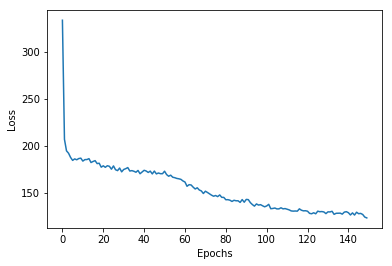

In [27]:
plt.plot(range(len(cost)), cost)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

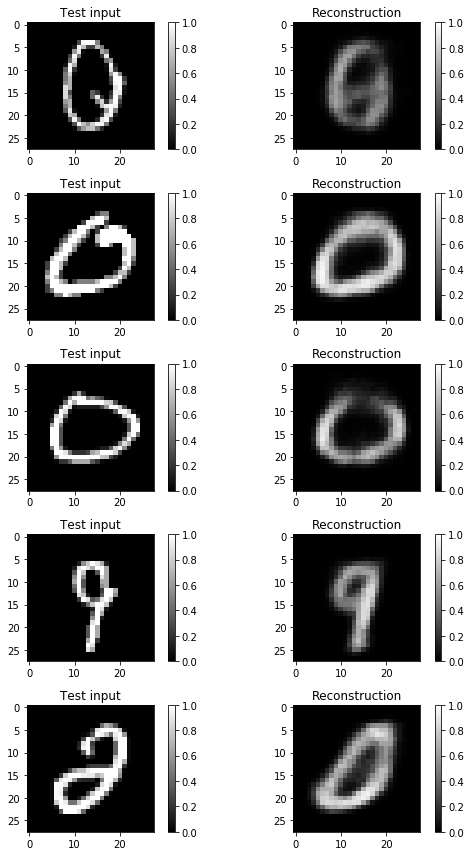

In [28]:
x_sample = test_dataset.next_batch(100)
x_reconstruct = vae.reconstruct(x_sample)

plt.figure(figsize=(8, 12))
for i in range(5):

    plt.subplot(5, 2, 2*i + 1)
    plt.imshow(x_sample[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    plt.title("Test input")
    plt.colorbar()
    plt.subplot(5, 2, 2*i + 2)
    plt.imshow(x_reconstruct[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    plt.title("Reconstruction")
    plt.colorbar()
    
plt.tight_layout()

In [30]:
network_architecture = \
    dict(n_hidden_recog_1=500, # 1st layer encoder neurons
         n_hidden_recog_2=500, # 2nd layer encoder neurons
         n_hidden_gener_1=500, # 1st layer decoder neurons
         n_hidden_gener_2=500, # 2nd layer decoder neurons
         n_input=784, # MNIST data input (img shape: 28*28)
         n_z=2)  # dimensionality of latent space

vae_2d, cost = train(network_architecture, training_epochs=200, beta=2)

beta= 2


/home/nahum/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 cost= 332.054490459
Epoch: 0006 cost= 184.786555232
Epoch: 0011 cost= 186.854111418
Epoch: 0016 cost= 185.495960469
Epoch: 0021 cost= 177.744596832
Epoch: 0026 cost= 176.191291031
Epoch: 0031 cost= 173.436299149
Epoch: 0036 cost= 169.767286340
Epoch: 0041 cost= 173.852463158
Epoch: 0046 cost= 171.823964800
Epoch: 0051 cost= 170.471810321
Epoch: 0056 cost= 170.099435534
Epoch: 0061 cost= 168.810587513
Epoch: 0066 cost= 168.841760986
Epoch: 0071 cost= 167.618728171
Epoch: 0076 cost= 162.166784248
Epoch: 0081 cost= 160.594257043
Epoch: 0086 cost= 160.428206775
Epoch: 0091 cost= 158.120349962
Epoch: 0096 cost= 159.290311774
Epoch: 0101 cost= 156.578595298
Epoch: 0106 cost= 155.690274920
Epoch: 0111 cost= 154.698951877
Epoch: 0116 cost= 159.681678305
Epoch: 0121 cost= 154.564191857
Epoch: 0126 cost= 155.086242909
Epoch: 0131 cost= 155.362753965
Epoch: 0136 cost= 156.790785887
Epoch: 0141 cost= 152.965403576
Epoch: 0146 cost= 154.867094390
Epoch: 0151 cost= 154.077734266
Epoch: 0

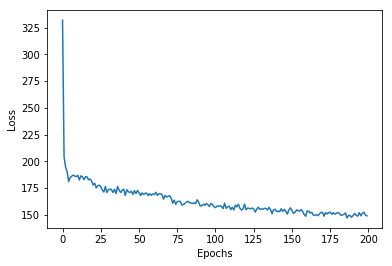

In [31]:
plt.plot(range(len(cost)), cost)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

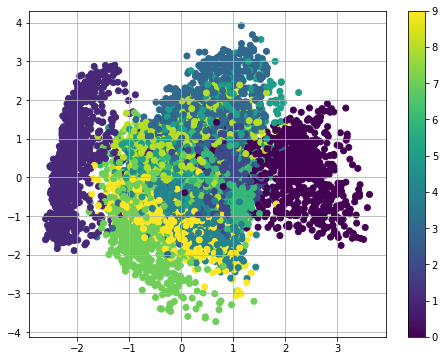

In [32]:
#x_sample, y_sample = test_dataset.next_batch(5000), testy_dataset.next_batch(5000)
z_mu = vae_2d.transform(test_x)
plt.figure(figsize=(8, 6)) 
plt.scatter(z_mu[:, 0], z_mu[:, 1], c=np.argmax(test_y, 1))
plt.colorbar()
plt.grid()

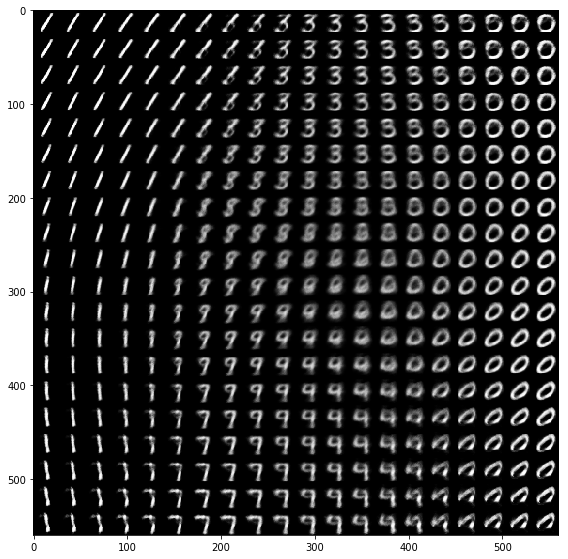

In [33]:
nx = ny = 20
x_values = np.linspace(-3, 3, nx)
y_values = np.linspace(-3, 3, ny)

canvas = np.empty((28*ny, 28*nx))
for i, yi in enumerate(x_values):
    for j, xi in enumerate(y_values):
        z_mu = np.array([[xi, yi]]*vae.batch_size)
        x_mean = vae_2d.generate(z_mu)
        canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = x_mean[0].reshape(28, 28)

plt.figure(figsize=(8, 10))        
Xi, Yi = np.meshgrid(x_values, y_values)
plt.imshow(canvas, origin="upper", cmap="gray")
plt.tight_layout()